### This notebook demonstrates drawing maps with Cartopy.
#### Reference:  <a href="https://scitools.org.uk/cartopy/docs/latest/">Cartopy Documentation</a>

In [1]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeat
from cartopy import util as cu

### Instead of using %matplotlib inline, we'll use %matplotlib notebook which will allow us to see each cell's influence on the resulting plot!

In [2]:
%matplotlib notebook

### Create a figure and an associated subplot `axes` instance.
#### By virtue of importing Cartopy, we can now convert the `axes` into a `GeoAxes` by specifying a projection that we have imported from *Cartopy's Coordinate Reference System* class as `ccrs`. This will effectively *georeference* the subplot.

#### Full list of projections in Cartopy: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html 

<IPython.core.display.Javascript object>


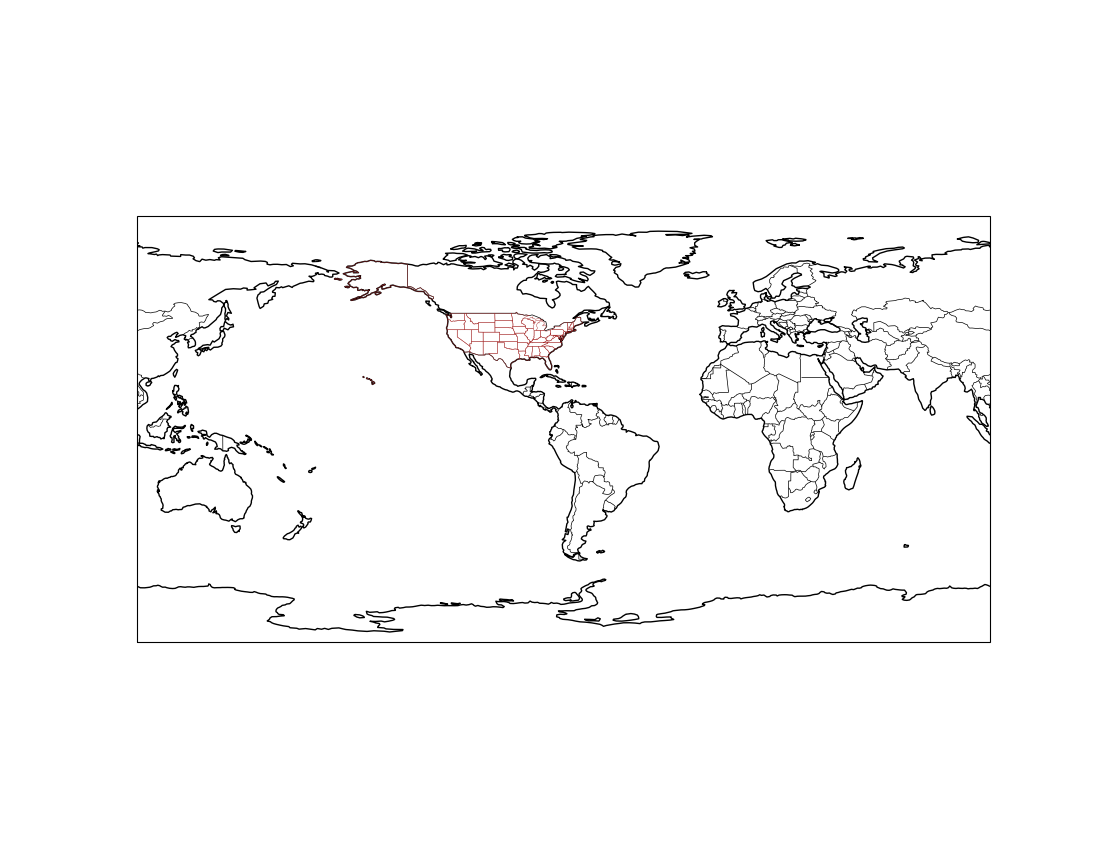

In [4]:
fig = plt.figure(figsize=(11,8.5))
# Create a GeoAxes that uses the PlateCarree projection 
# (basically a global lat-lon map projection, where each point is equally spaced in terms of degrees)
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=-75))

### We can tell that "something" has happened since when we mouse over the figure bounds above, we can see latitudes and longitudes displayed below the figure. We can now add in cartographic features, in the form of *shapefiles*, to our subplot. One of them is `coastlines`, which is a callable `GeoAxes` method that can be plotted directly on our subplot.

In [5]:
ax.coastlines()

### Cartopy provides other cartographic features via its `features` class, which we've imported as `cfeat`. These are also shapefiles, downloaded on initial request from http://www.naturalearthdata.com/ . Once downloaded, they "live" in your `~/.local/share/cartopy` directory.

#### We add them to our subplot via the `add_feature` method. We can define attributes for them in a manner similar to Matplotlib's `plot` method. A list of the various Natural Earth shapefiles appears in https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html .

In [6]:
ax.add_feature(cfeat.BORDERS,linewidth=0.5,edgecolor='black')

In [7]:
ax.add_feature (cfeat.STATES,linewidth=0.3,edgecolor='brown')

### Let's now visualize maps with some different projections. This time, we'll define an object to store our projection definition.
#### Reference: <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html">Cartopy Projections</a>

<IPython.core.display.Javascript object>


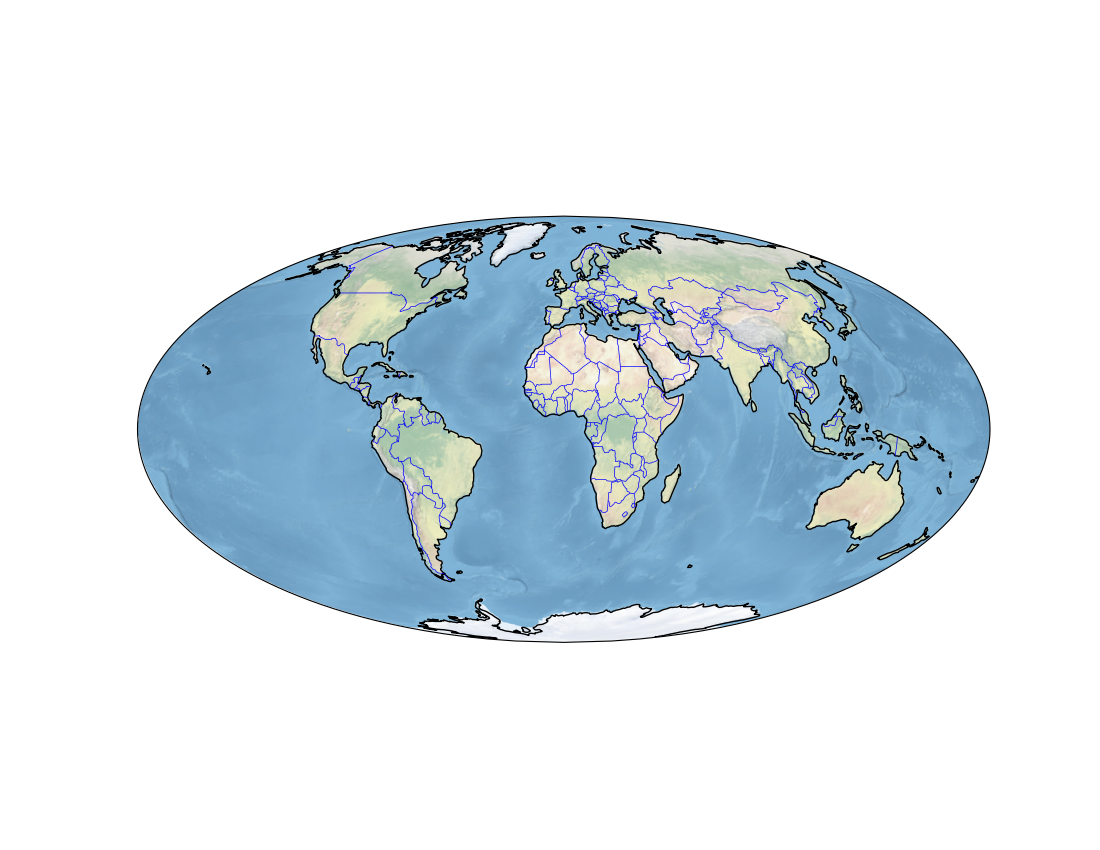

In [8]:
fig = plt.figure(figsize=(11,8.5))
# Mollweide projection (often used with global satellite mosaics)
proj=ccrs.Mollweide(central_longitude=0)
ax = plt.subplot(1,1,1,projection=proj)

In [9]:
# Add in the cartographic shapefiles
ax.coastlines()
ax.add_feature(cfeat.BORDERS,linewidth=0.5,edgecolor='blue')

### Add a fancy background image to the map.

In [10]:
ax.stock_img()

### Now, let's go back to PlateCarree, but let's use Cartopy's `set_extent` method to restrict the map coverage to a North American view. Let's also choose a lower resolution for coastlines, just to illustrate how one can specify that. Give a title to the map, and plot lat/lon lines as well.

### Reference for Natural Earth's three resolutions: http://www.naturalearthdata.com/downloads/ 

#### We'll also switch back to having Matplotlib figures display inline.

In [11]:
%matplotlib inline

In [17]:
proj=ccrs.PlateCarree()
lonW = -140
lonE = -40
latS = 15
latN = 65
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2
res = '110m' # Options are 10m, 50m, and 110m. Higher numbers mean lower resolution.

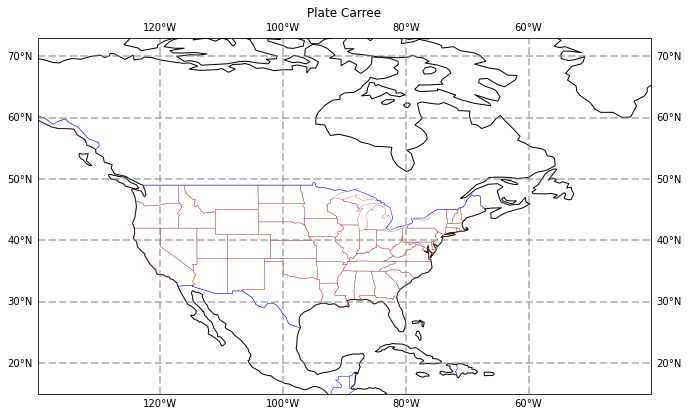

In [18]:
fig = plt.figure(figsize=(11,8.5))
ax = plt.subplot(1,1,1,projection=proj)
ax.set_title('Plate Carree')
gl = ax.gridlines(draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.set_extent ([lonW,lonE,latS,latN])
ax.coastlines(resolution=res, color='black')
ax.add_feature (cfeat.STATES,linewidth=0.3,edgecolor='brown')
ax.add_feature(cfeat.BORDERS,linewidth=0.5,edgecolor='blue')

#### Did you notice the output above the map about *cartopy.mpl.feature_artist*? We can eliminate that in one of two ways:
1. Use a generic object name, `_`, to assign that last feature to.
2. Add a semicolon at the end of the last line in the cell.

#### The PlateCarree projection exaggerates the spatial extent of regions closer to the poles. Let's try a couple different projections. 

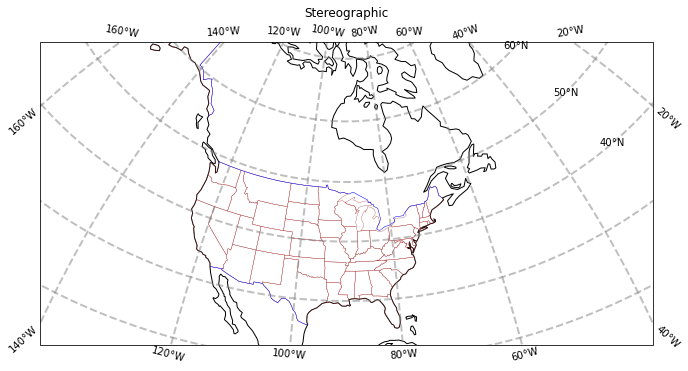

In [21]:
proj = ccrs.Stereographic(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(11,8.5))
ax = plt.subplot(1,1,1,projection=proj)
ax.set_title('Stereographic')
gl = ax.gridlines(draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.set_extent ([lonW,lonE,latS,latN])
ax.coastlines(resolution=res, color='black')
ax.add_feature (cfeat.STATES,linewidth=0.3,edgecolor='brown')
# Use generic object name to suppress text output to the screen
_ = ax.add_feature(cfeat.BORDERS,linewidth=0.5,edgecolor='blue')


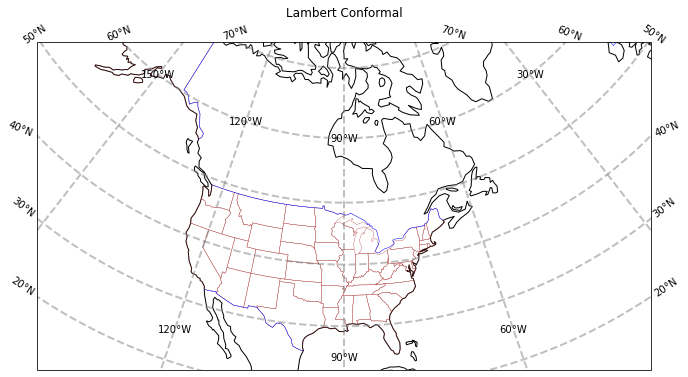

In [22]:
proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(11,8.5))
ax = plt.subplot(1,1,1,projection=proj)
ax.set_title('Lambert Conformal')
gl = ax.gridlines(draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.set_extent ([lonW,lonE,latS,latN])
ax.coastlines(resolution='110m', color='black')
ax.add_feature (cfeat.STATES,linewidth=0.3,edgecolor='brown')
# End last line with a semicolon to suppress text output to the screen
ax.add_feature(cfeat.BORDERS,linewidth=0.5,edgecolor='blue');

### Create a regional map, centered over New York State and add in some more Natural Earth geographic features.
#### <b>Be patient: this may take some time to plot (even a few minutes), especially if you haven't previously retreived these features from the Natural Earth shapefile server!</b>

/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_lakes.zip
  warnings.warn('Downloading: {}'.f

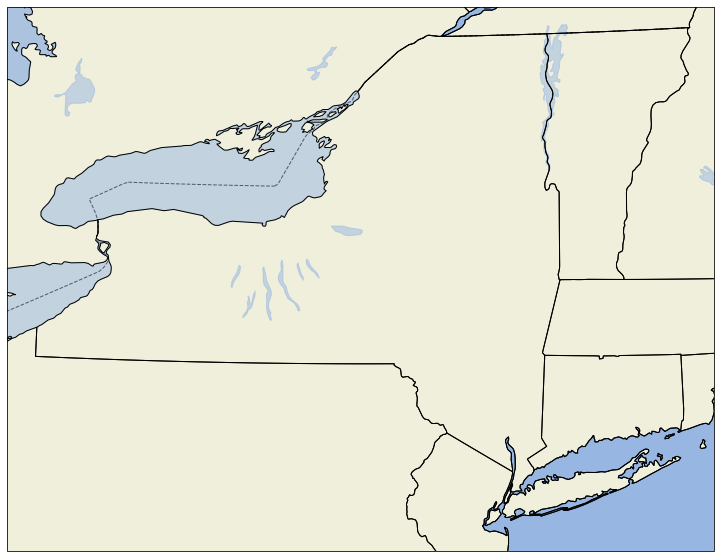

In [23]:
# Set the domain for defining the plot region.
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1,projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature (cfeat.LAND)
ax.add_feature (cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature (cfeat.BORDERS, linestyle='--')
ax.add_feature (cfeat.LAKES, alpha = 0.5)
ax.add_feature (cfeat.STATES);

### Let's create a new map, but this time use lower-resolution shapefiles from Natural Earth, and also eliminate plotting the country borders.
### Notice this is a bit more involved. First we create objects for our lower-resolution shapefiles via the `NaturalEarthFeature` method from Cartopy's `feature` class, and then we add them to the map with `add_feature`.

/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


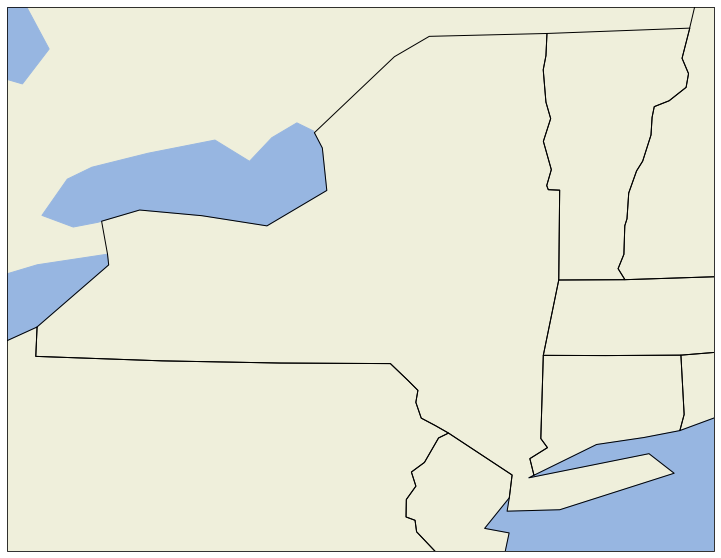

In [24]:
# Set the domain for defining the plot region.
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

fig = plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1,projection=proj)
ax.set_extent ((lonW,lonE,latS,latN))

# The features with names such as cfeat.LAND, cfeat.OCEAN, are higher-resolution (10m) shapefiles from the
# Naturalearth repository.  Lower resolution shapefiles (50m, 110m) can be used by using the cfeat.NaturalEarthFeature
# method as illustrated below.

resolution = '110m'

land_mask = cfeat.NaturalEarthFeature('physical', 'land', scale=resolution,
                                        edgecolor='face',
                                        facecolor=cfeat.COLORS['land'])
sea_mask = cfeat.NaturalEarthFeature('physical', 'ocean', scale=resolution,
                                        edgecolor='face',
                                        facecolor=cfeat.COLORS['water'])
lake_mask = cfeat.NaturalEarthFeature('physical', 'lakes', scale=resolution,
                                        edgecolor='face',
                                        facecolor=cfeat.COLORS['water'])
state_borders = cfeat.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes',
                                         scale=resolution, facecolor='none')

ax.add_feature(land_mask)
ax.add_feature(sea_mask)
ax.add_feature(lake_mask)
ax.add_feature(state_borders, linestyle='solid', edgecolor='black')

### Finally, let's create a figure with two subplots. On one, we'll repeat our hi-res NYS map; on the second, we'll plot over a different part of the world.

In [ ]:
# Create the figure object
fig = plt.figure(figsize=(30,24)) # Notice we need a bigger "canvas" so these two maps will be of a decent size

# Set the domain for defining the first plot region.
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# First subplot
ax = plt.subplot(2,1,1,projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature (cfeat.LAND)
ax.add_feature (cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature (cfeat.BORDERS, linestyle='--')
ax.add_feature (cfeat.LAKES, alpha = 0.5)
ax.add_feature (cfeat.STATES);

# Set the domain for defining the second plot region.
latN = 70
latS = 30.2
lonW = -10
lonE = 50
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# Second subplot
ax2 = plt.subplot(2,1,2,projection=proj)
ax2.set_extent ([lonW,lonE,latS,latN])
ax2.add_feature (cfeat.LAND)
ax2.add_feature (cfeat.OCEAN)
ax2.add_feature(cfeat.COASTLINE)
ax2.add_feature (cfeat.BORDERS, linestyle='--')
ax2.add_feature (cfeat.LAKES, alpha = 0.5)
ax2.add_feature (cfeat.STATES);

### In the next notebook, we'll use Cartopy and Matplotlib's `scatterplot` and `text` methods to plot meteorological data.